<a href="https://colab.research.google.com/github/Noob919/PET-EXPERIMENT/blob/main/pristine_DTG_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from keras import Sequential
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [17]:
df =  pd.read_csv("/content/PRISTINE PET MP.csv")
df.drop(0, inplace=True)
df.rename(columns={'Unnamed: 3':"Weight loss", 'Unnamed: 4':"DTG",'Unnamed: 5': "label"}, errors="raise",inplace =  True)
df_na = df.dropna()
df_na.tail(5)

,time,tem,heating rate,Weight loss,DTG,label
4050,67.48333333,967.66,14.33924426,56.454816,-0.013943,Validation
4051,67.5,967.85,14.33851852,56.454816,-0.013939,Training
4052,67.51666667,967.97,14.33675636,56.454816,-0.013936,Training
4053,67.53333333,968.2,14.33662389,56.454816,-0.013933,Training
4054,67.55,968.41,14.33619541,56.454816,-0.013929,Training


In [18]:
df_res =  df_na[['time', 'tem', 'heating rate', 'DTG']]
df_res.tail(3)

label = df_na['label']
label = label.reset_index()
def root_series(df):
  df_sq = df*df
  df_sum = df_sq.sum(axis=1)
  root =  pd.Series(data  = df_sum)
  root = pd.DataFrame(np.power(root, 0.5), columns = ['Root'])
  return root

def transformation(DataFrame):
  scaler  = Normalizer()
  transform_df = scaler.fit_transform(DataFrame)
  return transform_df

transform_df = transformation(df_res)
transform_df = pd.DataFrame(transform_df)
transform_df.columns = ['time', 'tem', 'heating rate', 'DTG']
transform_df
dataframe = pd.concat([transform_df,label],axis =1)
dataframe
df_training = dataframe.loc[dataframe['label'] == "Training"]
X =  df_training[['time', 'tem', 'heating rate']]
y = df_training['DTG']

In [19]:
model = keras.Sequential(
    [
        layers.Dense(3, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(12, activation="sigmoid"),
        layers.Dense(1),
    ]
)
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.fit(X, y, epochs=50, batch_size=10, verbose=1, validation_split=0.4)

Epoch 1/50
195/195 [==============================] - 2s 6ms/step - loss: 0.0459 - root_mean_squared_error: 0.2142 - val_loss: 1.5959e-05 - val_root_mean_squared_error: 0.0040
Epoch 2/50
195/195 [==============================] - 1s 3ms/step - loss: 1.2137e-04 - root_mean_squared_error: 0.0110 - val_loss: 1.8515e-05 - val_root_mean_squared_error: 0.0043
Epoch 3/50
195/195 [==============================] - 1s 3ms/step - loss: 1.0254e-04 - root_mean_squared_error: 0.0101 - val_loss: 1.3968e-05 - val_root_mean_squared_error: 0.0037
Epoch 4/50
195/195 [==============================] - 1s 3ms/step - loss: 8.4948e-05 - root_mean_squared_error: 0.0092 - val_loss: 7.0319e-06 - val_root_mean_squared_error: 0.0027
Epoch 5/50
195/195 [==============================] - 1s 3ms/step - loss: 6.9286e-05 - root_mean_squared_error: 0.0083 - val_loss: 1.5417e-05 - val_root_mean_squared_error: 0.0039
Epoch 6/50
195/195 [==============================] - 1s 4ms/step - loss: 5.6403e-05 - root_mean_squared

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 12        
                                                                 
 dense_5 (Dense)             (None, 5)                 20        
                                                                 
 dense_6 (Dense)             (None, 12)                72        
                                                                 
 dense_7 (Dense)             (None, 1)                 13        
                                                                 
Total params: 117 (468.00 Byte)
Trainable params: 117 (468.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


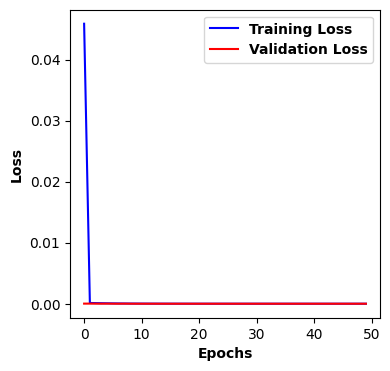

In [21]:
met_df = pd.DataFrame(model.history.history)

# Create a smaller figure with a specified size
plt.figure(figsize=(4, 4))

# Plot the training loss and validation loss
plt.plot(met_df['loss'], label='Training Loss', color='blue')
plt.plot(met_df['val_loss'], label='Validation Loss', color='red')

plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('Loss',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()


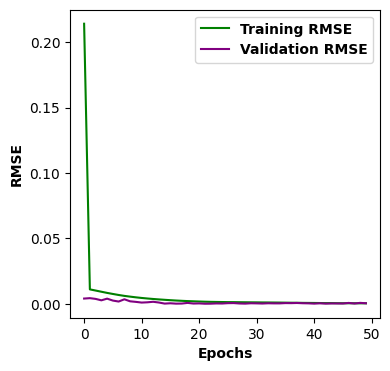

In [22]:
plt.figure(figsize=(4, 4))

# Plot the training RMSE and validation RMSE
plt.plot(met_df['root_mean_squared_error'], label='Training RMSE', color='green')
plt.plot(met_df['val_root_mean_squared_error'], label='Validation RMSE', color='purple')

plt.xlabel('Epochs',fontsize=10, fontweight='bold')
plt.ylabel('RMSE',fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Show the plot
plt.show()

In [23]:
df_val = dataframe.loc[dataframe['label'] == "Validation"]
X_val =  df_val[['time', 'tem', 'heating rate']]
y_val = df_val['DTG']

X_val_df = pd.DataFrame(X_val)
X_val_df = X_val_df.reset_index(drop = True)
predictions = model.predict(X_val)
prediction = pd.DataFrame(predictions)
y_val_df =  pd.DataFrame(y_val)
y_val_df = y_val_df.reset_index(drop= True)
final_df = pd.concat([X_val_df,prediction,y_val_df],axis =1)
final_df.rename(columns={0: "preditions"}, errors="raise",inplace =  True)
final_df

13/13 [==============================] - 0s 3ms/step


,time,tem,heating rate,preditions,DTG
0,0.000004,0.033315,0.999445,0.002621,9.051003e-08
1,0.000313,0.301892,0.953342,0.001131,8.167232e-07
2,0.000523,0.384615,0.923077,0.000768,0.000000e+00
3,0.000817,0.470588,0.882353,0.000444,1.267761e-06
4,0.001354,0.582518,0.812816,0.000115,1.563194e-06
...,...,...,...,...,...
400,0.069270,0.997486,0.014936,0.000287,-8.583528e-07
401,0.069312,0.997484,0.014910,0.000286,-8.573788e-07
402,0.069412,0.997477,0.014858,0.000284,-6.673923e-05
403,0.069495,0.997472,0.014818,0.000282,-1.441698e-05


In [24]:
print('MSE',mean_squared_error(y_val,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_val, predictions)))
print('MAE',mean_absolute_error(y_val,predictions))
print('R2_Score',r2_score(y_val,predictions))

MSE 4.09695620575427e-07
RMSE 0.0006400746992151986
MAE 0.000588252522680856
R2_Score -328.8217050459836


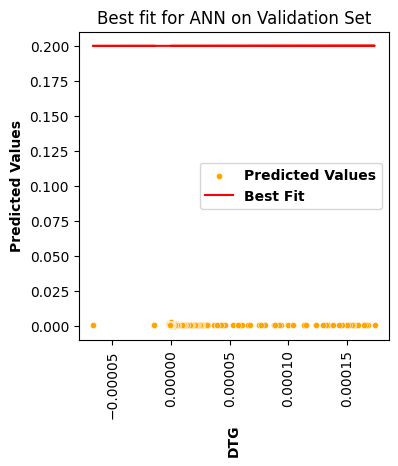

In [32]:
plt.figure(figsize=(4, 4))

# Plot the scatter plot with custom styling
sns.scatterplot(data=final_df, x='DTG', y='preditions', color='orange', label='Predicted Values', s=20)

# Plot the best fit line
plt.plot(x, a*x+b, color='red', label='Best Fit')

plt.title('Best fit for ANN on Validation Set')
plt.xlabel('DTG', fontsize=10, fontweight='bold', rotation=90)  # Rotate the x-axis label
plt.ylabel('Predicted Values', fontsize=10, fontweight='bold')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [33]:
df_test = dataframe.loc[dataframe['label'] == "Test"]
X_test =  df_test[['time', 'tem', 'heating rate']]
y_test = df_test['DTG']

predictions = model.predict(X_test)
prediction_test  = pd.DataFrame(predictions)
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',math.sqrt(mean_squared_error(y_test, predictions)))
print('MAE',mean_absolute_error(y_test,predictions))
print('R2_Score',r2_score(y_test,predictions))

13/13 [==============================] - 0s 3ms/step
MSE 4.0760619961737866e-07
RMSE 0.000638440443281422
MAE 0.0005874008580979053
R2_Score -326.17382586438237


In [34]:
X_test_df = pd.DataFrame(X_test)
X_test_df = X_test_df.reset_index(drop = True)
prediction = pd.DataFrame(predictions)
y_test_df =  pd.DataFrame(y_test)
y_test_df = y_test_df.reset_index(drop= True)
final_df_test = pd.concat([X_test_df,prediction,y_test_df],axis =1)
final_df_test.rename(columns={0: "predictions_test"}, errors="raise",inplace =  True)
final_df_test

,time,tem,heating rate,predictions_test,DTG
0,0.000015,0.066519,0.997785,0.002412,1.807016e-07
1,0.000225,0.257663,0.966235,0.001345,6.977295e-07
2,0.000485,0.371391,0.928477,0.000823,0.000000e+00
3,0.001150,0.544988,0.838443,0.000212,1.464476e-06
4,0.001458,0.599999,0.799999,0.000074,1.608853e-06
...,...,...,...,...,...
401,0.069281,0.997485,0.014929,0.000287,-8.580666e-07
402,0.069359,0.997481,0.014884,0.000285,-8.564689e-07
403,0.069380,0.997479,0.014873,0.000285,-8.560859e-07
404,0.069510,0.997471,0.014810,0.000282,-1.440581e-05


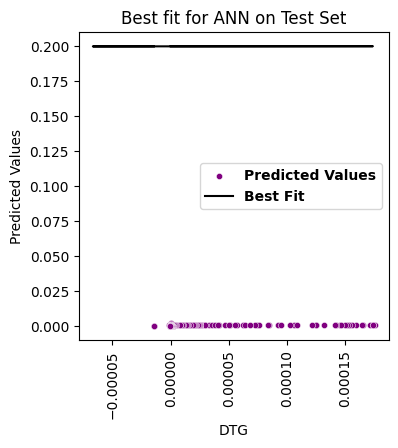

In [36]:
plt.figure(figsize=(4, 4))

# Plot the scatter plot with custom styling
sns.scatterplot(data=final_df_test, x='DTG', y='predictions_test', color='purple', label='Predicted Values', s=20)

# Plot the best fit line
plt.plot(x, a*x+b, color='black', label='Best Fit')

plt.title('Best fit for ANN on Test Set')
plt.xlabel('DTG')
plt.ylabel('Predicted Values')
legend = plt.legend()
for text in legend.get_texts():
    text.set_fontweight('bold')

# Rotate x-axis tick labels by 90 degrees
plt.xticks(rotation=90)
# Show the plot
plt.show()

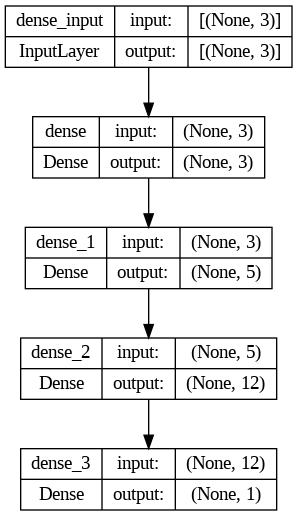

In [ ]:
plot_model(model, to_file='/content/model.jpg',show_shapes=True)